In [1]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.2 kB/s 
     |████████████████████████████████| 503 kB 60.6 MB/s 
     |████████████████████████████████| 2.9 MB 49.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 3.8 MB 42.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cd6606d3d4ce55e975e997588223aebacbb4bbd0e52166094c7b37498dc79eb5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_parameter = 0.01
epochs = 300

In [3]:
sample_points=50
x_train=np.linspace(0,30,sample_points)
y_train=6*x_train+7*np.random.randn(sample_points)

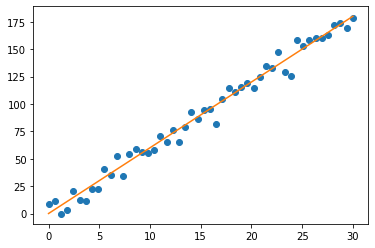

In [4]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, 6*x_train)
plt.show()

In [5]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W=tf.Variable(np.random.randn(), name='weights')
B=tf.Variable(np.random.randn(), name='bias')

In [6]:
prediction=W*X+B
cost_iteration=tf.reduce_sum((prediction-Y)**2)/(2*sample_points)
optimizer=tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)
init=tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 0.786783 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 1.456002 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 0.000062 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 0.168565 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 4.743744 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 1.794435 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 1.616195 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 5.751642 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 6.110919 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 18.654095 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 14.155077 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 30.293671 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 13.748062 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 32.645702 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 39.274158 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 35.812634 Weight -0.406435 Bias 0.049553
Epochs 0.000000 C

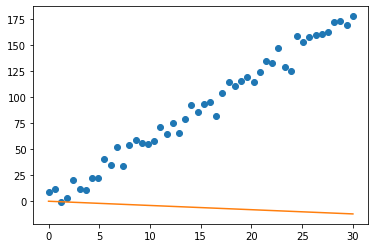

In [7]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      if not epoch%40:
        W1=sess.run(W)
        B1=sess.run(B)
        cost_iter=sess.run(cost_iteration, feed_dict={X:x, Y:y})
        print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight=sess.run(W)
  Bias=sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()

In [8]:
with tf.name_scope("Model") as scope:
  prediction=W*X+Bias
  weight_histogram=tf.summary.histogram("Weights", W)
  bias_histogram=tf.summary.histogram("Bias", B)

with tf.name_scope("Cost_function") as scope:
  cost_iteration=tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

cost_summary=tf.summary.scalar("Cost", cost_iteration)

In [9]:
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)
  
  init=tf.global_variables_initializer()

  merged_summary=tf.summary.merge_all()

Epochs 0.000000 Cost 0.786783 Weight -0.406435 Bias 0.049553
Epochs 0.000000 Cost 1.455783 Weight -0.404958 Bias 0.049553
Epochs 0.000000 Cost 0.000059 Weight -0.404939 Bias 0.049553
Epochs 0.000000 Cost 0.168112 Weight -0.403431 Bias 0.049553
Epochs 0.000000 Cost 4.729174 Weight -0.392767 Bias 0.049553
Epochs 0.000000 Cost 1.776565 Weight -0.384591 Bias 0.049553
Epochs 0.000000 Cost 1.587255 Weight -0.375310 Bias 0.049553
Epochs 0.000000 Cost 5.646127 Weight -0.354868 Bias 0.049553
Epochs 0.000000 Cost 5.929373 Weight -0.330900 Bias 0.049553
Epochs 0.000000 Cost 18.074766 Weight -0.283761 Bias 0.049553
Epochs 0.000000 Cost 13.392483 Weight -0.238611 Bias 0.049553
Epochs 0.000000 Cost 28.537415 Weight -0.165999 Bias 0.049553
Epochs 0.000000 Cost 12.201536 Weight -0.114112 Bias 0.049553
Epochs 0.000000 Cost 29.284697 Weight -0.026863 Bias 0.049553
Epochs 0.000000 Cost 34.272335 Weight 0.074992 Bias 0.049553
Epochs 0.000000 Cost 29.688904 Weight 0.176788 Bias 0.049553
Epochs 0.000000 Cos

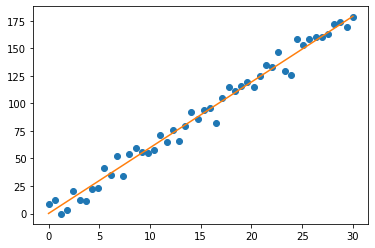

In [10]:
with tf.Session() as sess:
  sess.run(init)
  writer=tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict={X:x, Y:y})

      summary_epochs=sess.run(merged_summary, feed_dict={X:x, Y:y})
      writer.add_summary(summary_epochs, epoch)
      if not epoch%40:
        W1=sess.run(W)
        B1=sess.run(B)
        cost_iter=sess.run(cost_iteration, feed_dict={X:x, Y:y})
        print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight=sess.run(W)
  Bias=sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight*x_train+Bias)
  plt.show()

# New Section

In [11]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip

--2022-10-16 04:02:22--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8454063 (8.1M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.zip’

ngrok-v3-stable-lin 100%[===================>]   8.06M  27.4MB/s    in 0.3s    

2022-10-16 04:02:22 (27.4 MB/s) - ‘ngrok-v3-stable-linux-amd64.zip’ saved [8454063/8454063]



In [13]:
!unzip ngrok-v3-stable-linux-amd64.zip

Archive:  ngrok-v3-stable-linux-amd64.zip
  inflating: ngrok                   


In [14]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [15]:
get_ipython().system_raw('./ngrok http 6006 &')

In [16]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://b6e7-23-236-58-42.ngrok.io


In [17]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [20]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [21]:
n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

In [22]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [23]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [24]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [25]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [27]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0 , Train_loss = 47.46122741699219, Train_Accuracy 0.046875, Val_loss 47.46122741699219, Val_accuracy 0.046875
Iterations : 100 , Train_loss = 9.018322944641113, Train_Accuracy 0.4140625, Val_loss 9.018322944641113, Val_accuracy 0.4140625
Iterations : 200 , Train_loss = 4.905367851257324, Train_Accuracy 0.5546875, Val_loss 4.905367851257324, Val_accuracy 0.5546875
Iterations : 300 , Train_loss = 4.004587173461914, Train_Accuracy 0.6328125, Val_loss 4.004587173461914, Val_accuracy 0.6328125
Iterations : 400 , Train_loss = 3.0868210792541504, Train_Accuracy 0.625, Val_loss 3.0868210792541504, Val_accuracy 0.625
Iterations : 500 , Train_loss = 2.5244083404541016, Train_Accuracy 0.765625, Val_loss 2.5244083404541016, Val_accuracy 0.765625
Iterations : 600 , Train_loss = 2.6519851684570312, Train_Accuracy 0.7578125, Val_loss 2.6519851684570312, Val_accuracy 0.7578125
Iterations : 700 , Train_loss = 2.0369620323181152, Train_Accuracy 0.8046875, Val_loss 2.0369620323181152, Val_a

In [ ]:
img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()
dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))

# New Section

In [35]:
# This is the week_6 2nd session code

In [30]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import os
import numpy as np 
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

In [38]:
img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]
#looking at the shape of the file
print(img_database.shape)


total_num_images = (img_database.shape[0])

(60000, 784)


In [39]:
n_input = 784 #Input image is of size 28 x 28
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784  #Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

In [40]:
Weight_NN = {"W1": tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2": tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3": tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4": tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5": tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))
             }
Bias_NN = { "B1": tf.Variable(tf.random_normal([hidden_layer_1])),
            "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
            "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
            "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
            "B5": tf.Variable(tf.random_normal([output_layer]))
           }

In [41]:
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B2"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)

In [42]:
Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


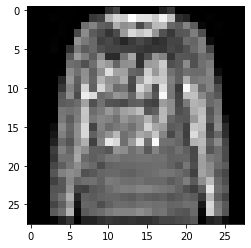

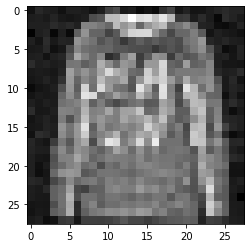

In [43]:
np.random.shuffle(img_database)

X_train = img_database

# Normalize the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10* np.random.normal(0,1, size = X_train.shape)

#Original image
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()

#Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()

In [44]:
#Define the metrics

# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [45]:
# Initialize the Session

sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss:', loss)

# pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# run it though the autoencoder
denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

Epoch 0 / 100 loss: 4562.9985
Epoch 1 / 100 loss: 4009.28
Epoch 2 / 100 loss: 3835.4412
Epoch 3 / 100 loss: 3798.336
Epoch 4 / 100 loss: 3609.2297
Epoch 5 / 100 loss: 3559.4915
Epoch 6 / 100 loss: 3546.941
Epoch 7 / 100 loss: 3414.0063
Epoch 8 / 100 loss: 3358.784
Epoch 9 / 100 loss: 3372.7915
Epoch 10 / 100 loss: 3225.7725
Epoch 11 / 100 loss: 3234.9502
Epoch 12 / 100 loss: 3244.8818
Epoch 13 / 100 loss: 3163.6392
Epoch 14 / 100 loss: 3116.7024
Epoch 15 / 100 loss: 3149.9736
Epoch 16 / 100 loss: 3093.6108
Epoch 17 / 100 loss: 3063.2422
Epoch 18 / 100 loss: 3069.2207
Epoch 19 / 100 loss: 3002.0876
Epoch 20 / 100 loss: 3055.4404
Epoch 21 / 100 loss: 3042.5334
Epoch 22 / 100 loss: 3001.1475
Epoch 23 / 100 loss: 3033.8528
Epoch 24 / 100 loss: 3002.9927
Epoch 25 / 100 loss: 3019.7886
Epoch 26 / 100 loss: 3049.4307
Epoch 27 / 100 loss: 2986.84
Epoch 28 / 100 loss: 2974.7869
Epoch 29 / 100 loss: 3004.59
Epoch 30 / 100 loss: 3047.8228
Epoch 31 / 100 loss: 2927.944
Epoch 32 / 100 loss: 2990.32

Epoch 0 / 100 loss: nan
Epoch 1 / 100 loss: nan
Epoch 2 / 100 loss: nan
Epoch 3 / 100 loss: nan
Epoch 4 / 100 loss: nan
Epoch 5 / 100 loss: nan
Epoch 6 / 100 loss: nan
Epoch 7 / 100 loss: nan
Epoch 8 / 100 loss: nan
Epoch 9 / 100 loss: nan
Epoch 10 / 100 loss: nan
Epoch 11 / 100 loss: nan
Epoch 12 / 100 loss: nan
Epoch 13 / 100 loss: nan
Epoch 14 / 100 loss: nan
Epoch 15 / 100 loss: nan
Epoch 16 / 100 loss: nan
Epoch 17 / 100 loss: nan
Epoch 18 / 100 loss: nan
Epoch 19 / 100 loss: nan
Epoch 20 / 100 loss: nan
Epoch 21 / 100 loss: nan
Epoch 22 / 100 loss: nan
Epoch 23 / 100 loss: nan
Epoch 24 / 100 loss: nan
Epoch 25 / 100 loss: nan
Epoch 26 / 100 loss: nan
Epoch 27 / 100 loss: nan
Epoch 28 / 100 loss: nan
Epoch 29 / 100 loss: nan
Epoch 30 / 100 loss: nan
Epoch 31 / 100 loss: nan
Epoch 32 / 100 loss: nan
Epoch 33 / 100 loss: nan
Epoch 34 / 100 loss: nan
Epoch 35 / 100 loss: nan
Epoch 36 / 100 loss: nan
Epoch 37 / 100 loss: nan
Epoch 38 / 100 loss: nan
Epoch 39 / 100 loss: nan
Epoch 40 /

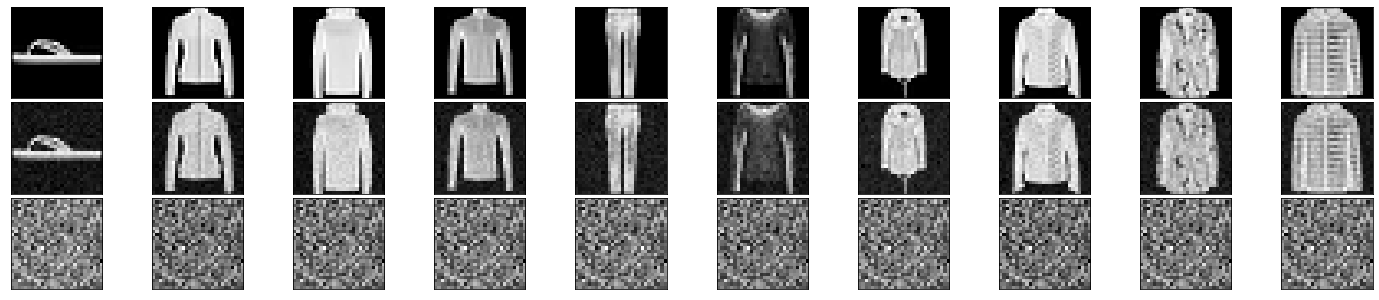

In [46]:
# Another way of running session

X_actual = X_train[20:30]
noisy_image = X_train_noisy[20:30]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
      X_epoch = X_train[ i*batch_size : (i*1)*batch_size ]
      X_noise_epoch = X_train_noisy[i*batch_size : (i*1)*batch_size ]
      _, loss = sess.run([optimizer, computed_loss], feed_dict={X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)
  denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

#pick any image
  

# print the original image 
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape((28,28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)